<a href="https://colab.research.google.com/github/LGreenII/TroyProjects/blob/main/CS6682Homework5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import pandas as pd
import numpy as np
import sklearn.svm as svm
import sklearn.metrics as metrics
import matplotlib.pyplot as plt

In [2]:
weather_data = pd.read_csv('/content/drive/MyDrive/CS6682/Homework3/weatherAUS.csv')

In [3]:
weather_data = weather_data.drop(columns=['Date'])

In [4]:
for column in weather_data.columns:
    if weather_data[column].dtype == 'object':
        weather_data[column] = weather_data[column].astype('category')
        weather_data[column] = weather_data[column].cat.codes

In [5]:
weather_data.fillna(weather_data.mean(), inplace=True)

In [6]:
x = weather_data.drop(['RainTomorrow'], axis=1)
y = weather_data['RainTomorrow']

In [7]:
x_train = x.sample(frac=0.05, random_state=0)
x_test = x.drop(x_train.index)
y_train = y.sample(frac=0.05, random_state=0)
y_test = y.drop(y_train.index)

In [ ]:
svm_model = svm.SVC(kernel='linear')
svm_model.fit(x_train, y_train)

In [14]:
y_pred = svm_model.predict(x_test)

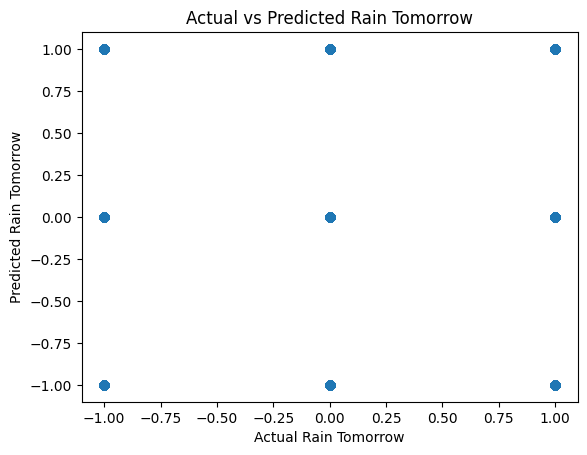

In [12]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Rain Tomorrow')
plt.ylabel('Predicted Rain Tomorrow')
plt.title('Actual vs Predicted Rain Tomorrow')
plt.show()

In [16]:
model_metrics = metrics.classification_report(y_test, y_pred)
print(model_metrics)

              precision    recall  f1-score   support

          -1       0.58      0.42      0.49      3118
           0       0.85      0.94      0.89    104823
           1       0.70      0.48      0.57     30246

    accuracy                           0.83    138187
   macro avg       0.71      0.61      0.65    138187
weighted avg       0.82      0.83      0.81    138187



In [20]:
from sklearn.metrics import r2_score
accuracy = svm_model.score(x_test, y_test)
print(accuracy)

0.8273498954315529
